<a href="https://colab.research.google.com/github/Prophetcze/MPA-MLF/blob/main/Lab_08/Lab_08_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, SimpleRNN

### 1.1 Generating dataset

In [ ]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [ ]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [ ]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
no_training_epochs = 5

### 1.3 Data examination

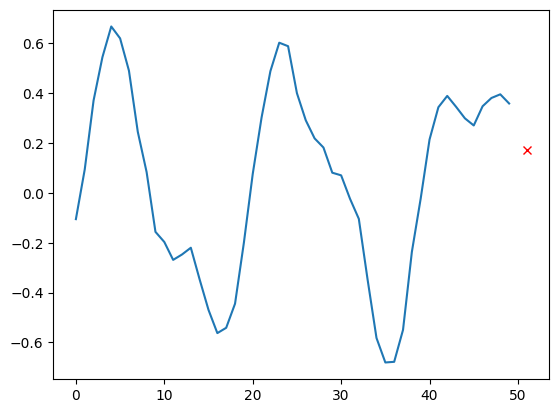

In [ ]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [ ]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [ ]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [ ]:
model_linear.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 1s 3ms/step - loss: 0.1510 - mean_squared_error: 0.1510 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0111 - val_mean_squared_error: 0.0111


In [ ]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

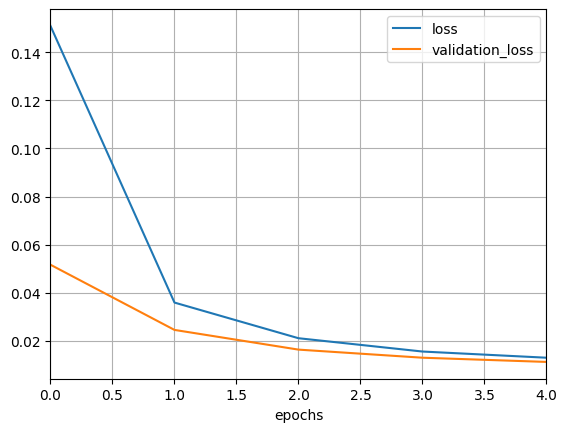

In [ ]:
plot_function(history_linear)

In [ ]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.011571550741791725
Test MSE:  0.011571550741791725


### 1.5 Simple RNN Model

In [ ]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [ ]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [ ]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 8s 34ms/step - loss: 0.9244 - mean_squared_error: 0.9244 - val_loss: 0.8761 - val_mean_squared_error: 0.8761
Epoch 2/5
219/219 [==============================] - 7s 34ms/step - loss: 0.6963 - mean_squared_error: 0.6963 - val_loss: 0.6180 - val_mean_squared_error: 0.6180
Epoch 3/5
219/219 [==============================] - 6s 30ms/step - loss: 0.4813 - mean_squared_error: 0.4813 - val_loss: 0.4850 - val_mean_squared_error: 0.4850
Epoch 4/5
219/219 [==============================] - 8s 36ms/step - loss: 0.4272 - mean_squared_error: 0.4272 - val_loss: 0.4429 - val_mean_squared_error: 0.4429
Epoch 5/5
219/219 [==============================] - 7s 32ms/step - loss: 0.3782 - mean_squared_error: 0.3782 - val_loss: 0.3810 - val_mean_squared_error: 0.3810


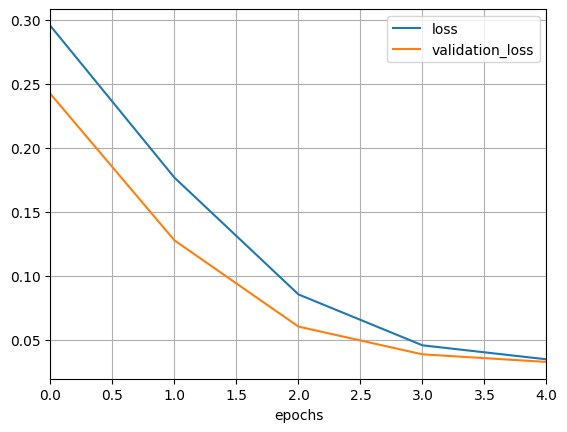

In [ ]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [ ]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [ ]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [ ]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 32s 134ms/step - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 2/5
219/219 [==============================] - 28s 126ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 3/5
219/219 [==============================] - 27s 125ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 4/5
219/219 [==============================] - 27s 124ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 5/5
219/219 [==============================] - 28s 128ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0040 - val_mean_squared_error: 0.0040


In [ ]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.003999392502009869
Test MSE:  0.003999392502009869


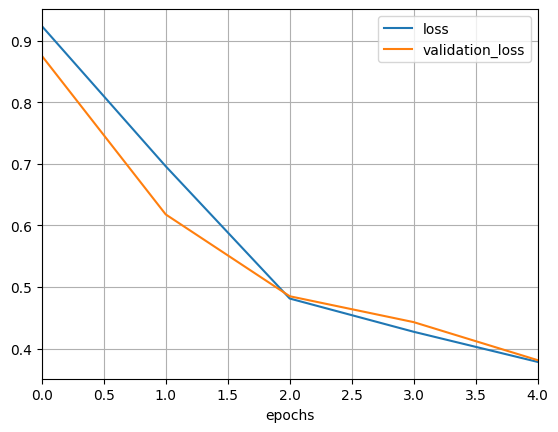

In [ ]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [ ]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU, Dropout, Conv1D, MaxPooling1D
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

### 2.2 - Dataset examination

In [ ]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [ ]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [ ]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [ ]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [ ]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size, input_shape=[None]),
    keras.layers.Conv1D(filters=24, kernel_size=5, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.GRU(256, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.GRU(128),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')

    #keras.layers.SimpleRNN(128, return_sequences=True),
    #keras.layers.SimpleRNN(128),
    #keras.layers.LSTM(128, return_sequences=True),
    #keras.layers.LSTM(128),
    #keras.layers.GRU(128, return_sequences=True),
    #keras.layers.GRU(128),
    ])


In [ ]:
optimizer = Adam(learning_rate = 0.001)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 23s 115ms/step - loss: 0.6722 - accuracy: 0.6194 - val_loss: 0.5416 - val_accuracy: 0.7542
Epoch 2/5
157/157 [==============================] - 11s 72ms/step - loss: 0.4134 - accuracy: 0.8158 - val_loss: 0.5408 - val_accuracy: 0.7150
Epoch 3/5
157/157 [==============================] - 8s 54ms/step - loss: 0.3427 - accuracy: 0.8525 - val_loss: 0.4394 - val_accuracy: 0.8128
Epoch 4/5
157/157 [==============================] - 8s 51ms/step - loss: 0.2519 - accuracy: 0.8995 - val_loss: 0.5445 - val_accuracy: 0.7814
Epoch 5/5
157/157 [==============================] - 6s 40ms/step - loss: 0.1681 - accuracy: 0.9380 - val_loss: 0.6949 - val_accuracy: 0.7516


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6797352433204651
Test accuracy:  76.03600025177002 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

LSTM in comparision to RNN is much faster, from 11 minutes with RNN to 2 minutes with LSTM and achives higher accuracy of 82% against 50%.

GRU is comparable with the LSTM.

All comparisions were made with the same settings.